In [2]:
from utils.models import isoelastic_utility, Fractal, Gamble, IsoelasticAgent

import numpy as np
import itertools
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams["font.size"] = 15

In [2]:
from itertools import product, combinations
import random

los_fractals = [
    Fractal(c, alpha=1.0) 
    for c in np.logspace(-0.05, 0, num=20, endpoint=False, base=2) - 1
]
win_fractals = [
    Fractal(c, alpha=1.0) 
    for c in np.logspace(0.05, 0, num=20, endpoint=False, base=2) - 1
]

mixed_gambles = [Gamble(f1, f2) for f1, f2 in product(los_fractals, win_fractals)]
mixed_gamble_pairs = [(g1, g2) for g1, g2 in combinations(mixed_gambles, 2)] 
random.shuffle(mixed_gamble_pairs)
print(len(mixed_gamble_pairs))

def evaluate_agent(agent, gamble_sequence, n_reps):
    agent.reset_wealth()
    for _ in range(n_reps):
        for g1, g2 in gamble_sequence:
            g = agent.choose_gamble(g1, g2)
            agent.apply_gamble(g)
    return agent.wealth

etas = np.arange(-1, 2.1, 0.1)
# etas_perf = np.zeros(etas.shape)

# for i, eta in enumerate(etas):
#     agent = IsoelasticAgent(eta, initial_wealth=1)
#     etas_perf[i] = evaluate_agent(agent, mixed_gamble_pairs, 1)

79800


Text(0, 0.5, 'log final wealth [$\\log{x}$]')

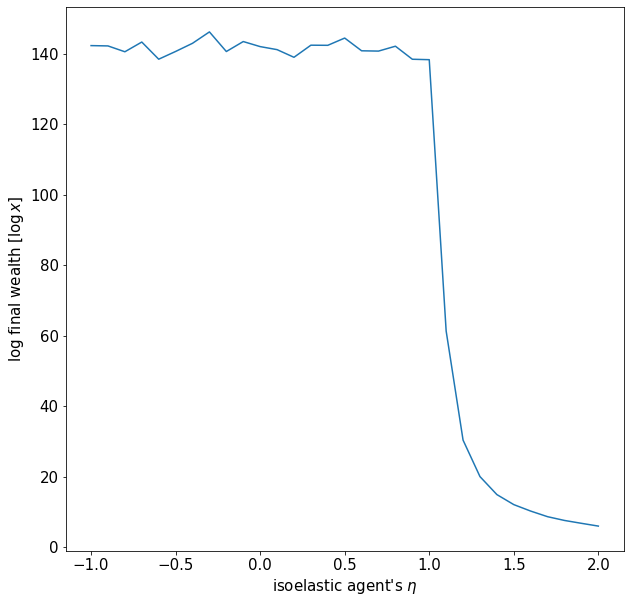

In [3]:
etas_perf = np.array([2.07226790e+142, 1.68320457e+142, 3.70652365e+140, 2.12032061e+143,
       2.87074046e+138, 4.53174510e+140, 9.39055565e+142, 1.59493557e+146,
       4.35468003e+140, 2.93179135e+143, 1.08200752e+142, 1.49033703e+141,
       9.99649891e+138, 2.71548619e+142, 2.50309063e+142, 2.87259446e+144,
       6.97680599e+140, 5.74603474e+140, 1.39591445e+142, 2.78740552e+138,
       2.09786655e+138, 2.12857247e+061, 2.36962235e+030, 1.05624031e+020,
       8.32821129e+014, 1.18868204e+012, 1.73594237e+010, 4.42928933e+008,
       3.80132753e+007, 5.86012497e+006, 9.58221727e+005])

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(etas, np.log10(etas_perf))
ax.set_xlabel(r"isoelastic agent's $\eta$")
ax.set_ylabel("log final wealth [$\log{x}$]")

- softmax for choice
- figure out gamble space to maximize number of discriminant trials
- 

## Isoelastic utility function

## $u(x)=\frac{x^{1-\eta}-1}{1-\eta}$


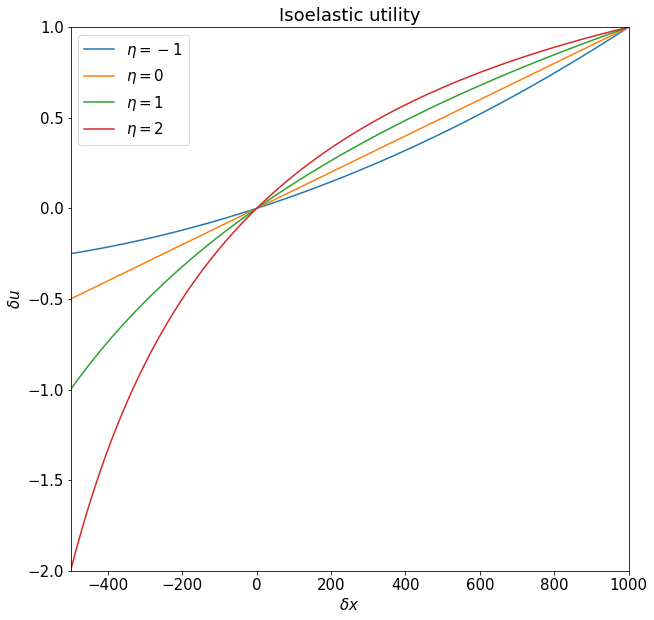

In [4]:
# Isoelastic utility function
x0 = float(1000)
x1 = np.linspace(x0 - 500, x0 + 1000, 100) 
dx = x1 - x0

fig, ax = plt.subplots(figsize=(10, 10))

for eta in (-1, 0, 1, 2):
    y = isoelastic_utility(x1, eta) - isoelastic_utility(x0, eta) 
    y_norm = y / np.max(y)
    ax.plot(dx, y_norm, label=f"$\eta = {eta}$")

plt.legend()
plt.xlabel("$\delta x$")
plt.ylabel("$\delta u$")
plt.title("Isoelastic utility")
ax.set_xlim(min(dx), max(dx))
ax.set_ylim(min(y_norm), max(y_norm));

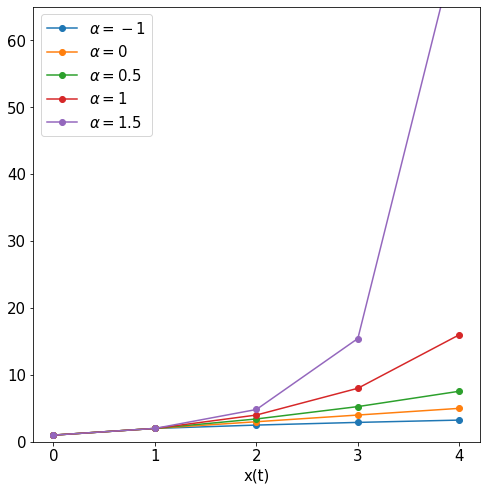

In [5]:
# Dynamics for different values of alpha
fig, ax = plt.subplots(figsize=(8, 8))

c = 1
x0 = 1

for alpha in (-1, 0, 0.5, 1, 1.5):
    f = Fractal(c, alpha)
    y = f.evolve_wealth(x0, 5)
    ax.plot(np.power(y, 1), "-o", label=r"$\alpha" + f"={alpha}$")

ax.set_ylim([0, 65])
ax.set_xticks(range(5))
ax.set_xlabel("t")
ax.set_xlabel("x(t)")
plt.legend()

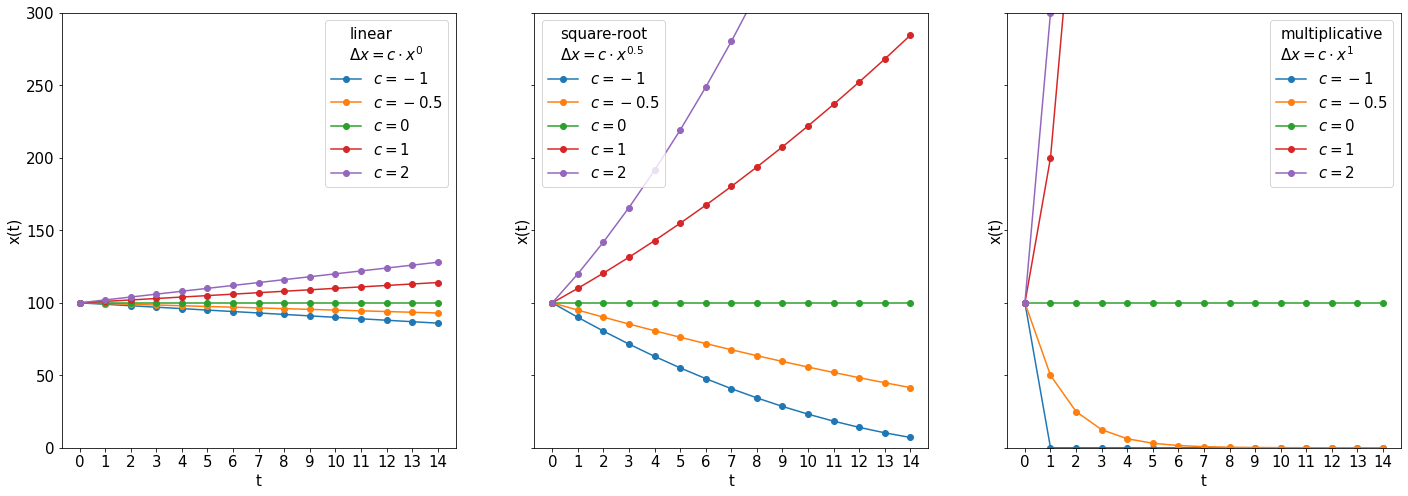

In [9]:
# Dynamics for different values of c
fig, axs = plt.subplots(figsize=(24, 8), ncols=3, sharey=True)

alpha = 0.5
x0 = 100

dynamics_names = ("linear", "square-root", "multiplicative")
for i, alpha in enumerate((0, 0.5, 1)):

    for c in (-1, -0.5, 0, 1, 2):
        f = Fractal(c, alpha)
        y = f.evolve_wealth(x0, 15)
        axs[i].plot(np.power(y, 1), "-o", label=f"$c={c}$")

    axs[i].set_xticks(range(15))
    axs[i].set_xlabel("t")
    axs[i].set_ylabel("x(t)")
    axs[i].set_ylim([0, 300])
    axs[i].legend(
        title=f"{dynamics_names[i]}\n" + r"$\Delta x=c\cdot x^{" + str(alpha) + r"}$")

### Time optimal utility functions and interpretation of $c$

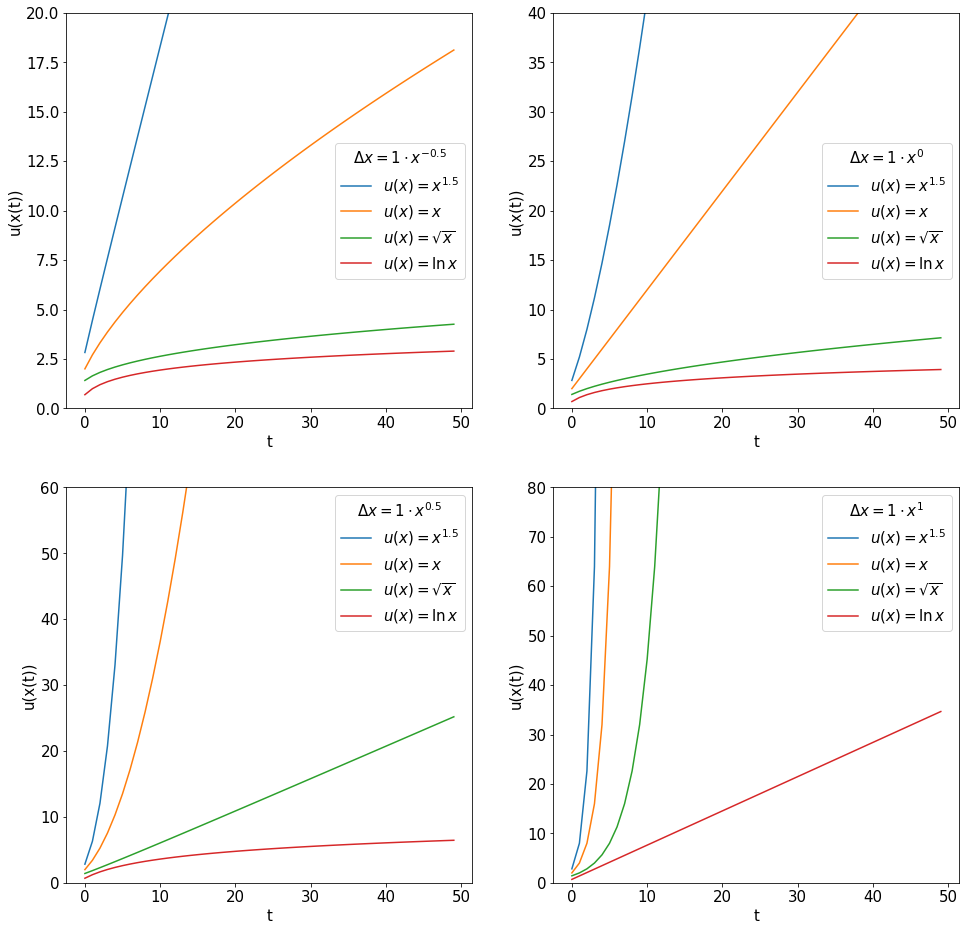

In [3]:
fig, axs = plt.subplots(figsize=(16, 16), ncols=2, nrows=2)

x0 = 2
c = 1

limits = [(0, 20), (0, 40), (0, 60), (0, 80)]

for k, alpha in enumerate((-0.5, 0, .5, 1)):
    f = Fractal(c, alpha)
    y = f.evolve_wealth(x0, 50)
    i, j = k // 2, k % 2
    
    ax = axs[i][j] 
    ax.plot(np.power(y, 1.5), label=r"$u(x)=x^{1.5}$")
    ax.plot(np.power(y, 1), label=r"$u(x)=x$")
    ax.plot(np.power(y, 0.5), label=r"$u(x)=\sqrt{x}$")
    ax.plot(np.log(y), label=r"$u(x)=\ln{x}$")
    
    
    ax.set_xlabel("t")
    ax.set_ylabel("u(x(t))")
    ax.set_ylim(limits[k])
    ax.legend(title=r"$\Delta x=1 \cdot x^{" + str(alpha) + r"}$")

<function utils.models.isoelastic_utility(x, eta)>

/home/kmb/Desktop/Neuroscience/Projects/BONNA_ergodicity/code/utils/models.py:37: RuntimeWarning: overflow encountered in power
  return x + self.c * np.power(x, self.alpha)
/home/kmb/Desktop/Neuroscience/Projects/BONNA_ergodicity/code/utils/models.py:10: RuntimeWarning: overflow encountered in power
  return (np.power(x, 1-eta) - 1) / (1 - eta)


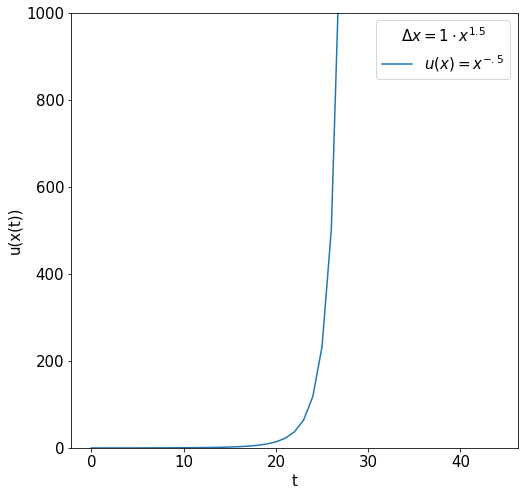

In [21]:
fig, ax = plt.subplots(figsize=(8, 8), ncols=1, nrows=1)

x0 = 0.5
c = 0.1

limits = [(0, 20), (0, 40), (0, 60), (0, 80)]
alpha = 1.5
f = Fractal(c, alpha)
y = f.evolve_wealth(x0, 50)
    
ax.plot(isoelastic_utility(y, -1.5), label=r"$u(x)=x^{-.5}$")
    
    
ax.set_xlabel("t")
ax.set_ylabel("u(x(t))")
ax.set_ylim((0, 1000))
ax.legend(title=r"$\Delta x=1 \cdot x^{" + str(alpha) + r"}$")

In [13]:
y

array([1.00000000e+000, 1.10000000e+000, 1.21536897e+000, 1.34935584e+000,
       1.50609941e+000, 1.69093281e+000, 1.91081473e+000, 2.17495090e+000,
       2.49570645e+000, 2.88997329e+000, 3.38126648e+000, 4.00302122e+000,
       4.80392775e+000, 5.85684612e+000, 7.27425686e+000, 9.23618433e+000,
       1.20431615e+001, 1.62225310e+001, 2.27565128e+001, 3.36122312e+001,
       5.30992774e+001, 9.17923231e+001, 1.79736997e+002, 4.20703248e+002,
       1.28360986e+003, 5.88246328e+003, 5.09993203e+004, 1.20271845e+006,
       1.33103073e+008, 1.53694524e+011, 6.02557740e+015, 4.67733052e+022,
       1.01157268e+033, 3.21733019e+048, 5.77089871e+071, 4.38394582e+106,
       9.17905067e+158, 2.78097222e+237,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf,             inf,             inf,
                   inf,             inf])

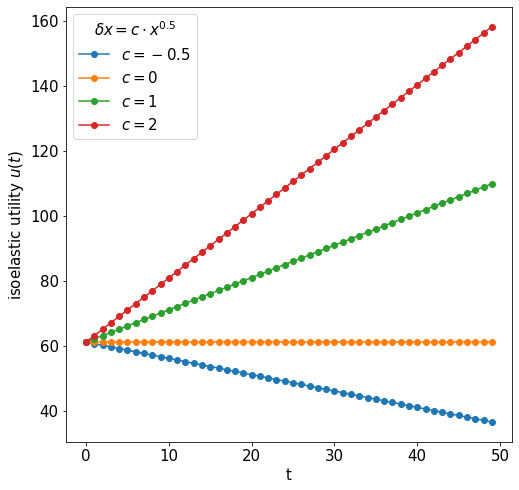

In [8]:
# Dynamics for different values of c
fig, ax = plt.subplots(figsize=(8, 8))

alpha = 0.5
x0 = 1000

for c in (-0.5, 0, 1, 2):
    f = Fractal(c, alpha)
    y = f.evolve_wealth(x0, 50)
    uy = isoelastic_utility(y, alpha)
    ax.plot(uy, "-o", label=f"$c={c}$")

ax.set_xlabel("t")
ax.set_ylabel(r"isoelastic utility $u(t)$")
ax.legend(title=r"$\delta x=c\cdot x^{" + str(alpha) + r"}$")

In [1]:
import numpy as np

In [43]:
x = 100
c = 100

l = np.sqrt(x+c*np.sqrt(x)+c*np.sqrt(x+c*np.sqrt(x)))-np.sqrt(x+c*np.sqrt(x))
r = np.sqrt(x+c*np.sqrt(x))-np.sqrt(x)

np.abs(l-r) / np.max((np.abs(l), np.abs(r)))

0.3041380835604404

In [4]:
np.sqrt(1)

1.0